In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D
import tensorflow as tf
import keras

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


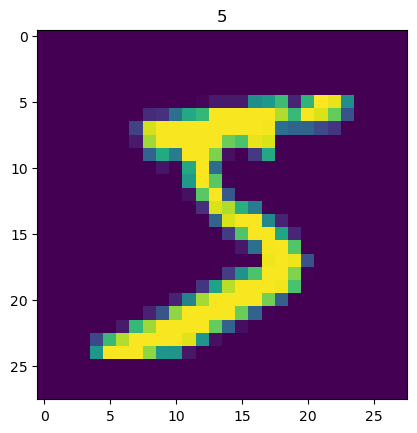

In [4]:
plt.imshow(X_train[0])
plt.title(y_train[0])
plt.show()

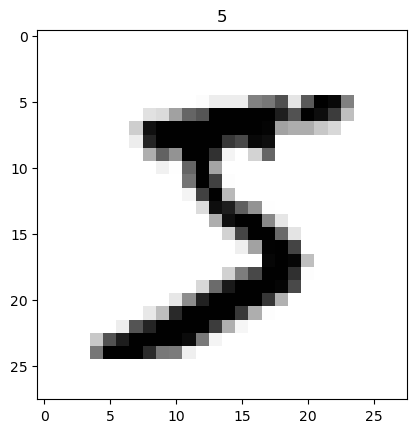

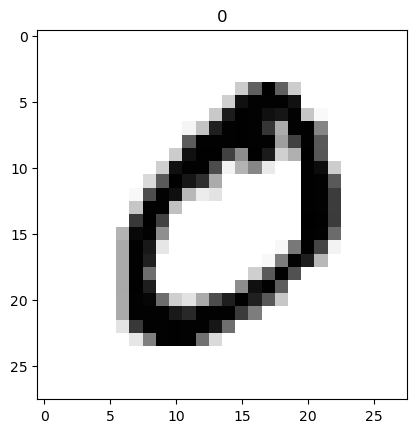

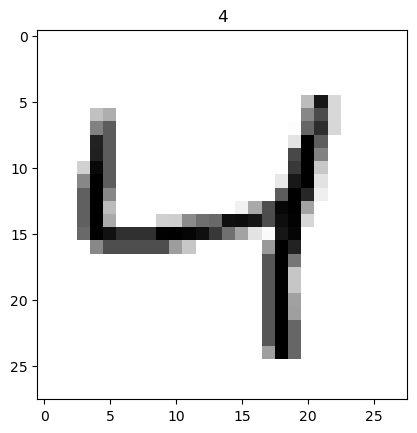

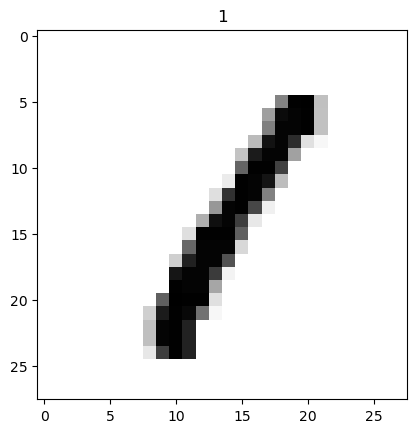

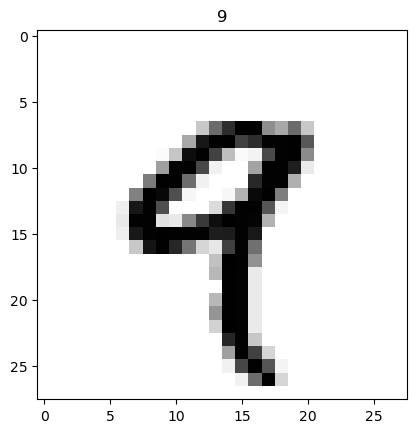

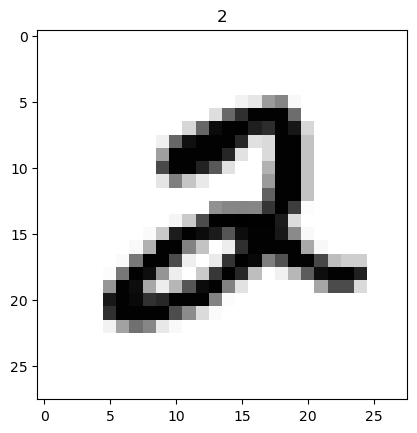

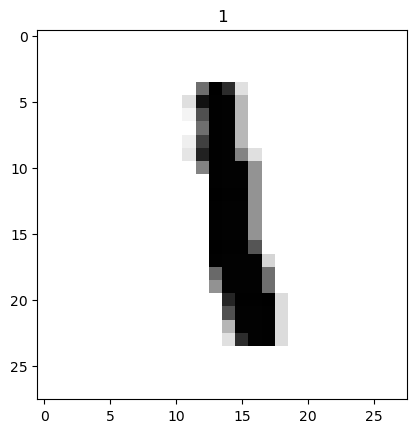

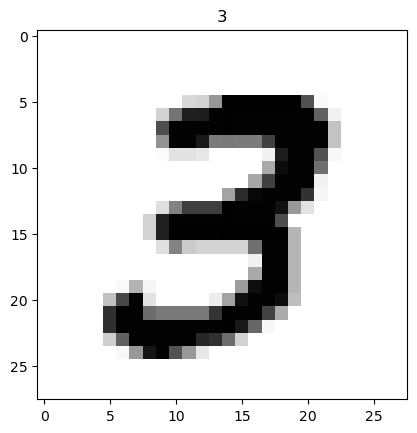

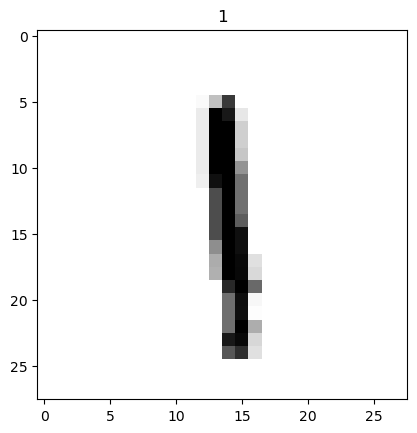

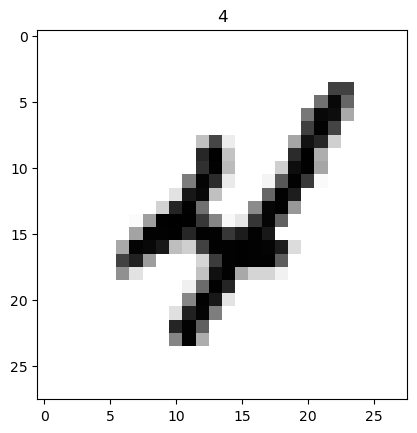

In [5]:
for i in range(10):
    plt.imshow(X_train[i], cmap = 'binary')
    plt.title(y_train[i])
    plt.show()

In [6]:
X_train[0].shape

(28, 28)

In [7]:
len(X_train), len(y_train), len(X_test), len(y_test)

(60000, 60000, 10000, 10000)

In [8]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [9]:
X_train = X_train/255
X_test = X_test/255

In [10]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

Model

In [57]:
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape= (28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation = tf.nn.relu))
model.add(Dropout(0.3))
model.add(Dense(10, activation = tf.nn.softmax))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')

C:\Users\sidal\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [58]:
model.fit(X_train, y_train, epochs=1, validation_split=0.2)

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 31s 19ms/step - loss: 0.4577 - val_loss: 0.1079


In [45]:
yprob = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


In [59]:
ypred = yprob.argmax(axis=1)

In [60]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, ypred)

0.9605

In [61]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Layer (type)                       ┃ Output Shape                  ┃     Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                  │ (None, 26, 26, 28)            │         280 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ max_pooling2d_5 (MaxPooling2D)     │ (None, 13, 13, 28)            │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ flatten_5 (Flatten)                │ (None, 4732)                  │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dense_10 (Dense)                   │ (None, 128)                   │     605,824 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dropout_5 (Dropout)                │ (None, 128)                   │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dense_11 (Dense)                   │ (None, 10)                    │       1,290 │
└────────────────────────────────────┴───────────────────────────────┴─────────────┘

 Total params: 1,822,184 (6.95 MB)

 Trainable params: 607,394 (2.32 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,214,790 (4.63 MB)

Applying the model to digits I myself wrote on a piece of paper

In [62]:
import cv2
import matplotlib.pyplot as plt

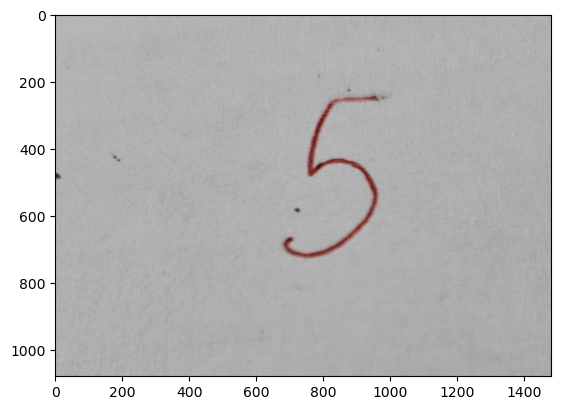

In [72]:
img5 = cv2.imread('teste_5.jpg')
plt.imshow(img5)

In [64]:
img5.shape

(1079, 1481, 3)

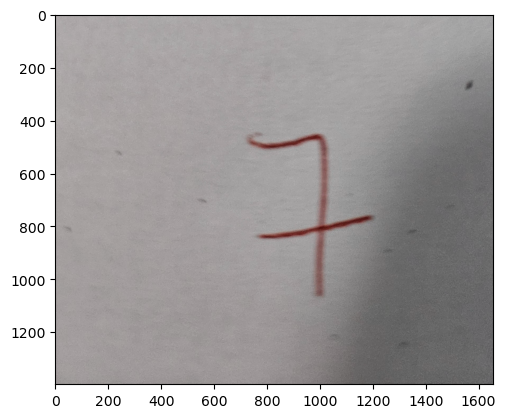

In [65]:
img7 = cv2.imread('teste_7.jpg')
plt.imshow(img7)

In [66]:
img7.shape

(1397, 1655, 3)

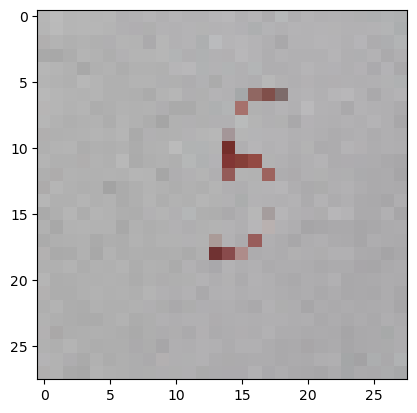

In [67]:
img5resized = cv2.resize(img5, (28, 28))
plt.imshow(img5resized)

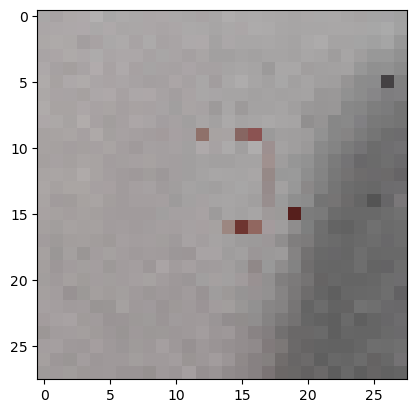

In [68]:
img7resized = cv2.resize(img7, (28,28))
plt.imshow(img7resized)

In [69]:
model.predict(img5resized)

ValueError: Exception encountered when calling MaxPooling2D.call().

[1mNegative dimension size caused by subtracting 2 from 1 for '{{node sequential_5_1/max_pooling2d_5_1/MaxPool2d}} = MaxPool[T=DT_FLOAT, data_format="NHWC", explicit_paddings=[], ksize=[1, 2, 2, 1], padding="VALID", strides=[1, 2, 2, 1]](sequential_5_1/conv2d_5_1/add)' with input shapes: [28,26,1,28].[0m

Arguments received by MaxPooling2D.call():
  • inputs=tf.Tensor(shape=(28, 26, 1, 28), dtype=float32)